In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 1. Import you data and perform basic data exploration phase

   * Import the dataset

In [3]:
# Import the dataset
data = pd.read_csv("Credit_card_dataset.csv")

# View the data head
data.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


   * Perform basic data exploration

In [4]:
# Use pandas profile report to do the exploration
from ydata_profiling import ProfileReport

credit_profile = ProfileReport(data, title = "Credit Card Profile Report", explorative = True)
credit_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  7.58it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

   * CUST_ID is a categorical column and all rows are unique so we don't need it in our clustering so the column will be dropped
   * CREDIT_LIMIT has 1 missing row, this will be dropped, this is just 0.1% of the dataset
   * All other columns are in float, we don't need to encode
   * The dataset has 8950 rows and 6 columns

## 2. Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )

In [14]:
# Drop the cust_id column
credit_data = data.drop(columns = 'CUST_ID', axis = 1)

# Drop the missing row
credit_data.dropna(inplace = True)

In [15]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BALANCE_FREQUENCY  8949 non-null   float64
 1   PURCHASES          8949 non-null   float64
 2   PAYMENTS           8949 non-null   float64
 3   CREDIT_LIMIT       8949 non-null   float64
 4   CASH_ADVANCE       8949 non-null   float64
dtypes: float64(5)
memory usage: 419.5 KB


In [17]:
credit_data.shape

(8949, 5)

   * After removing the cust_id column and the missing row in credit card, we are left with 8,949 rows and 5 columns

## 3. Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')

   * Extract the relevant features for clustering

In [18]:
# extraxt purchases and credit_limit
X = credit_data[['PURCHASES', 'CREDIT_LIMIT']]

# Initialize the standard scaler
scaler = StandardScaler()

# Scale X using fit transform
X_scaled = scaler.fit_transform(X)

   * Use the elbow curve to identify the best cluster

## 4. Perform partitional clustering using the K-means algorithm. Then, plot the clusters

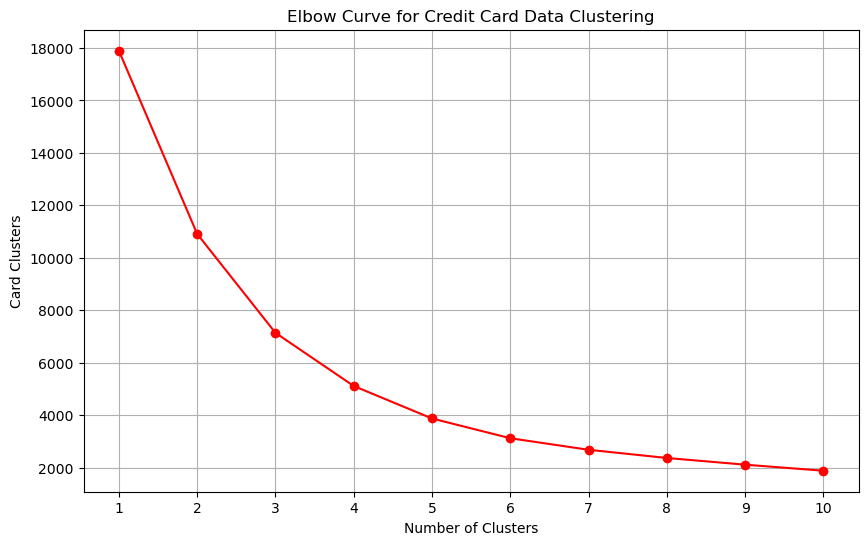

In [34]:
# Create an empty list to store the card clusters (1-10)
card_cluster = []

# Use a for loop for instantiate the best cluster
for i in range(1, 11):
    # Initialize KMeans with the current number of clusters (i)
    kmeans = KMeans(n_clusters = i, random_state = 42, n_init =10)
    # Fit the KMeans model on the standardized data
    kmeans.fit(X_scaled)
    # Append the inertia (sum of squared distances) to the list
    card_cluster.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), card_cluster, marker = 'o', color = "r")
plt.title('Elbow Curve for Credit Card Data Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel("Card Clusters")
plt.grid(True)
plt.xticks(range(1, 11)) 
plt.show()

## 5. Find the best k value and plot the clusters again.

In [36]:
for i in range(1, 11):
    # Initialize KMeans with the current number of clusters (i)
    kmeans = KMeans(n_clusters = i, random_state = 42, n_init =10)
    # Fit the KMeans model on the standardized data
    kmeans.fit(X_scaled)
    # Append the inertia (sum of squared distances) to the list
    card_cluster.append(kmeans.inertia_)
    # Print inertia for debugging
    print(f"Inertia for {i} clusters: {kmeans.inertia_}")

Inertia for 1 clusters: 17897.999999999975
Inertia for 2 clusters: 10910.765782501496
Inertia for 3 clusters: 7137.796991813494
Inertia for 4 clusters: 5110.120245885509
Inertia for 5 clusters: 3870.8692193875786
Inertia for 6 clusters: 3117.7706114042076
Inertia for 7 clusters: 2677.558870649509
Inertia for 8 clusters: 2364.6617063246763
Inertia for 9 clusters: 2109.2031807753156
Inertia for 10 clusters: 1878.586683916037


   * In this case, we can choose 4 clusters

In [37]:
# Fit the kmeans with 4 clusters
kmeans = KMeans(n_clusters = 4, random_state = 42)

# Fit the KMeans model to the standardized data
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

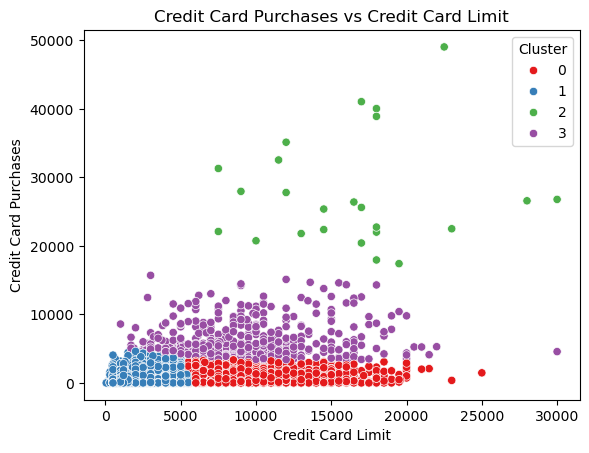

In [49]:
# Add the kmeans labels to the dataset
credit_data['Cluster'] = kmeans.labels_

# Visualize the data using scatterplot
plt.figure(figure = (10, 6))
sns.scatterplot(credit_data, x = 'CREDIT_LIMIT', y = 'PURCHASES', hue = 'Cluster', palette = 'Set1')
plt.title('Credit Card Purchases vs Credit Card Limit')
plt.xlabel('Credit Card Limit')
plt.ylabel('Credit Card Purchases')
plt.show()

 * From the grouping, we can see that the people with the lower credit limit purchase less, even some with higher credit limit does not purchase higher
 * Only few people made higher purchases when their credit card limit increased